# Estimating Optimal Number of Topics in Non-negative Matrix Factorization (NMF) Using Reconstruction Error, Topic Coherence, and the Elbow Method (KneeLocator)

Topics: 2, Error: 896.26, Coherence: 0.6170
Topics: 3, Error: 894.88, Coherence: 0.6977
Topics: 4, Error: 893.58, Coherence: 0.6642
Topics: 5, Error: 892.47, Coherence: 0.6473
Topics: 6, Error: 891.40, Coherence: 0.6587
Topics: 7, Error: 890.32, Coherence: 0.6362
Topics: 8, Error: 889.32, Coherence: 0.6167
Topics: 9, Error: 888.40, Coherence: 0.6492
Topics: 10, Error: 887.51, Coherence: 0.6459
Topics: 11, Error: 886.62, Coherence: 0.6339
Topics: 12, Error: 885.79, Coherence: 0.6384
Topics: 13, Error: 884.98, Coherence: 0.6218
Topics: 14, Error: 884.17, Coherence: 0.6217
Topics: 15, Error: 883.40, Coherence: 0.6343
Topics: 16, Error: 882.59, Coherence: 0.6361
Topics: 17, Error: 881.80, Coherence: 0.6129
Topics: 18, Error: 881.09, Coherence: 0.6232
Topics: 19, Error: 880.30, Coherence: 0.6195
Topics: 20, Error: 879.63, Coherence: 0.6338


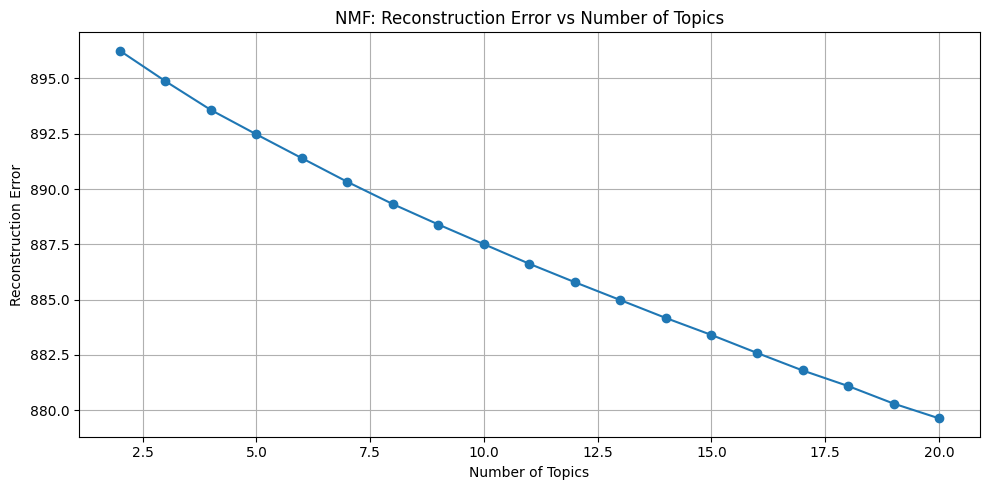

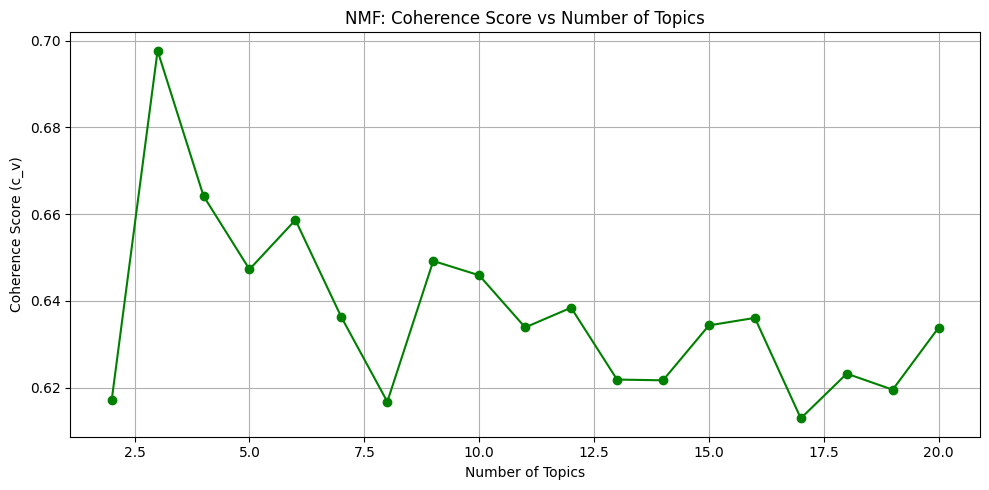


🦵 Elbow (Optimal Topic Count based on Error): 8
🏆 Best Coherence Topic Count: 3 with score 0.6977


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
from kneed import KneeLocator

# --- Step 1: Load dataset ---
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df['content_words'] = df['content_words'].apply(eval)
df['joined_content'] = df['content_words'].apply(lambda x: ' '.join(x))
texts = df['content_words'].tolist()

# --- Step 2: TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.4,
    min_df=10,
    max_features=10000,
    stop_words='english'
)
tfidf = tfidf_vectorizer.fit_transform(df['joined_content'])
feature_names = tfidf_vectorizer.get_feature_names_out()

# --- Step 3: Define function to extract topics from NMF ---
def get_nmf_topics(model, feature_names, topn=10):
    topics = []
    for topic_weights in model.components_:
        top_words = [feature_names[i] for i in topic_weights.argsort()[:-topn - 1:-1]]
        topics.append(top_words)
    return topics

# --- Step 4: Loop through topic numbers ---
topic_range = range(2, 21)
reconstruction_errors = []
coherence_scores = []

dictionary = Dictionary(texts)

for num_topics in topic_range:
    nmf_model = NMF(n_components=num_topics, random_state=42)
    W = nmf_model.fit_transform(tfidf)
    reconstruction_errors.append(nmf_model.reconstruction_err_)

    topics = get_nmf_topics(nmf_model, feature_names, topn=10)
    cm = CoherenceModel(
        topics=topics, texts=texts, dictionary=dictionary, coherence='c_v'
    )
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)

    print(f"Topics: {num_topics}, Error: {nmf_model.reconstruction_err_:.2f}, Coherence: {coherence:.4f}")

# --- Step 5: Plot Reconstruction Error ---
plt.figure(figsize=(10, 5))
plt.plot(topic_range, reconstruction_errors, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Reconstruction Error")
plt.title("NMF: Reconstruction Error vs Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 6: Plot Coherence Score ---
plt.figure(figsize=(10, 5))
plt.plot(topic_range, coherence_scores, marker='o', color='green')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.title("NMF: Coherence Score vs Number of Topics")
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Step 7: Find optimal number of topics using KneeLocator ---
knee = KneeLocator(
    list(topic_range), reconstruction_errors, curve="convex", direction="decreasing"
)
print(f"\n🦵 Elbow (Optimal Topic Count based on Error): {knee.elbow}")

# --- Step 8: Report topic with max coherence (optional) ---
best_coherence_k = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"🏆 Best Coherence Topic Count: {best_coherence_k} with score {max(coherence_scores):.4f}")


# WordCloud and Bar Chart as the Visualization of the Topic Modelling Result

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np
import pandas as pd

df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df.head()

,outlet,article_text,nlp_label,nlp-image_label,content_sentence,content_words
0,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,tij iginla shy away famous last name instead e...,"['tij', 'iginla', 'shy', 'away', 'famous', 'la..."
1,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,mean thrilled go anywhere think would cool pla...,"['mean', 'thrilled', 'go', 'anywhere', 'think'..."
2,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,flame currently hold ninth pick iginla happens...,"['flame', 'currently', 'hold', 'ninth', 'pick'..."
3,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,max plante son former nhl player derek mirosla...,"['max', 'plante', 'son', 'former', 'nhl', 'pla..."
4,CBC.ca,This week on The Sunday Magazine with host Piy...,Likely to be Bias,Likely to be Unbiased,week sunday magazine host piya chattopadhyay s...,"['week', 'sunday', 'magazine', 'host', 'piya',..."


In [9]:
# additional pre-processing
custom_stopwords = set([
    "could", "should", "would", "may", "might", "said", "year", "just", "many", "even", 
    "still", "back",  "day", "week", "month", "use", "give", "take", "since", "much", 
    "got", "whether", "look", "always", "let", "yet", "asked", "across", "cooky", "cookie",
    "cookies", "setting", "settings", "site", "sites", "website", "websites", "web", "page",
    "browser", "privacy", "advertisement", "advertisements", "ad", "ads", "clear", "real", 
    "associated", "th"])

# Uncomment this line when running the code for the first time after importing csv
df['content_words'] = df['content_words'].apply(eval)

df['content_words'] = df['content_words'].apply(lambda x: [word for word in x if word not in custom_stopwords])

df["content_sentence"] = df["content_words"].apply(lambda x: " ".join(x))

# drop all null values

df.head()

,outlet,article_text,nlp_label,nlp-image_label,content_sentence,content_words
0,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,tij iginla shy away famous last name instead e...,"[tij, iginla, shy, away, famous, last, name, i..."
1,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,mean thrilled go anywhere think cool play cana...,"[mean, thrilled, go, anywhere, think, cool, pl..."
2,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,flame currently hold ninth pick iginla happens...,"[flame, currently, hold, ninth, pick, iginla, ..."
3,CBC.ca,Tij Iginla doesn't shy away from his famous la...,Likely to be Bias,Likely to be Unbiased,max plante son former nhl player derek mirosla...,"[max, plante, son, former, nhl, player, derek,..."
4,CBC.ca,This week on The Sunday Magazine with host Piy...,Likely to be Bias,Likely to be Unbiased,sunday magazine host piya chattopadhyay sunday...,"[sunday, magazine, host, piya, chattopadhyay, ..."


In [10]:
df.dropna(inplace=True)

In [11]:
from sklearn.model_selection import train_test_split
train_text, test_text = train_test_split(df['content_sentence'], test_size=0.2, random_state=42)

In [12]:
# Step 1: Generate TF-IDF matrix
vectorizer = TfidfVectorizer(
    max_df=0.8,         
    min_df=10,          
    max_features=10000,
    stop_words='english'
)
tfidf = vectorizer.fit_transform(train_text)

# Step 2: Fit the NMF model
n_topics = 8  
nmf = NMF(n_components=n_topics, random_state=42)
W = nmf.fit_transform(tfidf)   # Document-topic matrix
H = nmf.components_        # Topic-term matrix

# Step 3: Display the top words for each topic
feature_names = vectorizer.get_feature_names_out()

def display_topics(H, feature_names, top_words=5):
    for topic_idx, topic in enumerate(H):
        top_features = [feature_names[i] for i in topic.argsort()[:-top_words - 1:-1]]
        print(f"Topic #{topic_idx + 1}: {' | '.join(top_features)}")

display_topics(H, feature_names)


Topic #1: biden | harris | president | debate | joe
Topic #2: service | device | information | visit | choice
Topic #3: people | company | new | like | time
Topic #4: time | module | automobile | consent | saved
Topic #5: article | edition | account | national | post
Topic #6: trump | donald | republican | president | court
Topic #7: israel | gaza | hamas | war | israeli
Topic #8: party | election | labour | vote | conservative


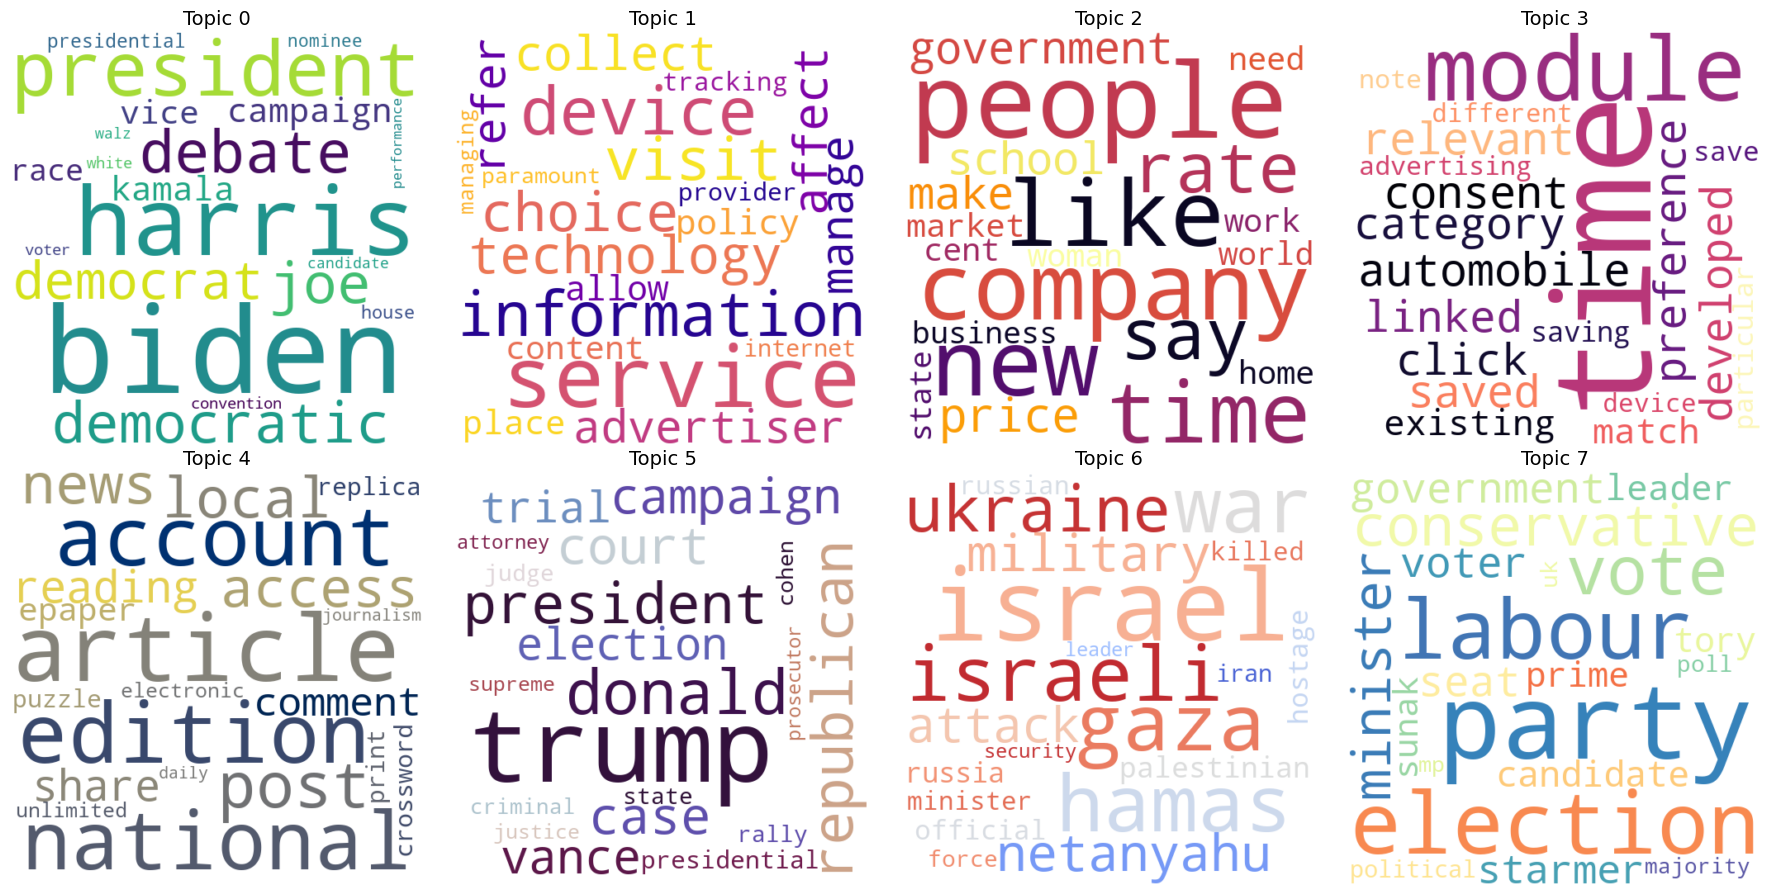

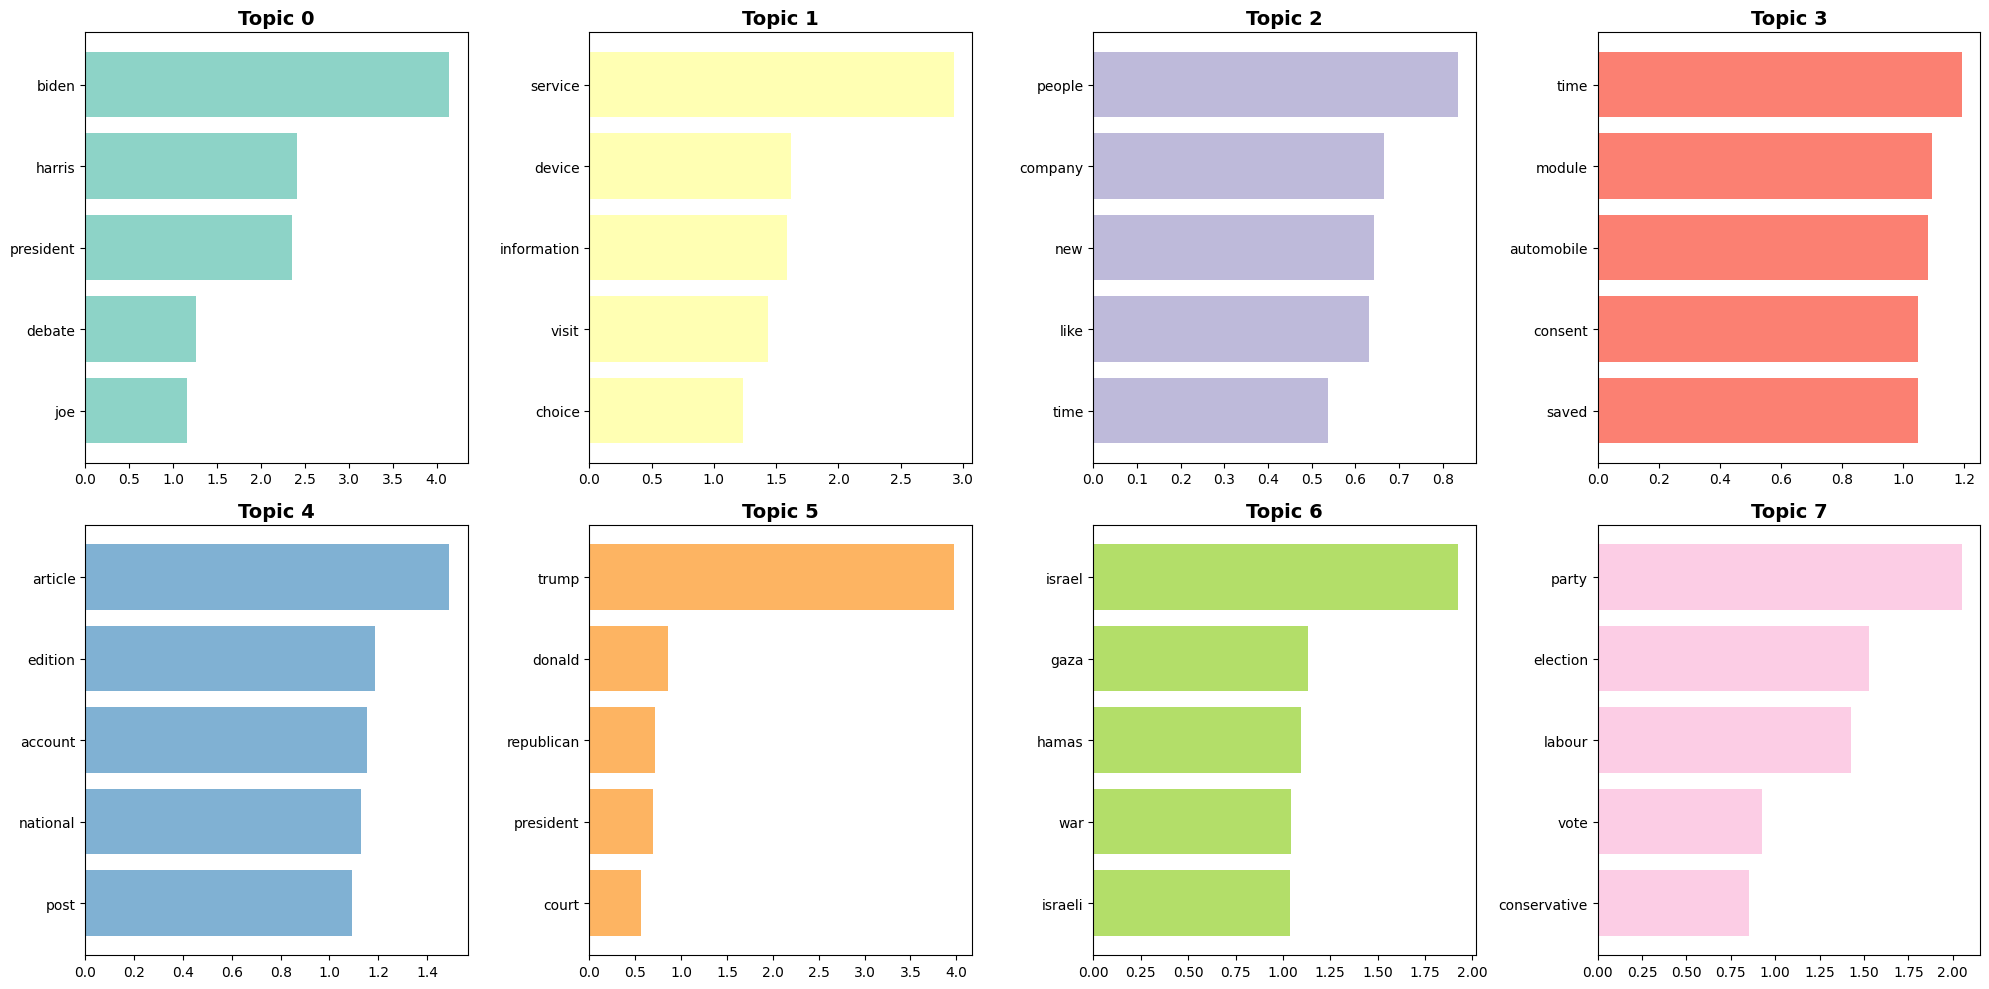

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

num_topics = 8
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 9))
axes = axes.flatten()
wordcloud_colors = [
    "viridis", "plasma", "inferno", "magma", "cividis", "twilight",
    "coolwarm", "Spectral"
]

for i, topic in enumerate(H):
    top_words = {feature_names[j]: topic[j] for j in topic.argsort()[:-21:-1]}
    wordcloud = WordCloud(
        width=500,
        height=500,
        background_color='white',
        colormap=wordcloud_colors[i % len(wordcloud_colors)]
    ).generate_from_frequencies(top_words)

    axes[i].imshow(wordcloud, interpolation='bilinear')
    axes[i].axis("off")
    axes[i].set_title(f"Topic {i}", fontsize=14)

plt.tight_layout()
plt.show()

# Step 7: Bar chart visualization (2 rows × 4 columns)
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
axes = axes.flatten()
distinct_colors = sns.color_palette("Set3", num_topics)

for i, topic in enumerate(H):
    top_indices = topic.argsort()[:-6:-1]
    words = [feature_names[j] for j in top_indices]
    values = topic[top_indices]

    axes[i].barh(words, values, color=distinct_colors[i])
    axes[i].invert_yaxis()
    axes[i].set_title(f"Topic {i}", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [23]:
import joblib
joblib.dump(nmf, "nmf_model.pkl")
joblib.dump(vectorizer, "nmf_vectorizer.pkl")

['nmf_vectorizer.pkl']

# Assigning Dominant NMF Topic to Each Article

In [26]:
import pandas as pd
import numpy as np
import joblib

# Step 1: Load TF-IDF and NMF model
tfidf_vectorizer = joblib.load("nmf_vectorizer.pkl")
nmf_model = joblib.load("nmf_model.pkl")

# Step 2: Load dataset and preprocess
df = pd.read_csv("../datasets/news_dataset_content_cleaned.csv")
df['content_words'] = df['content_words'].apply(eval)
df['joined_content'] = df['content_words'].apply(lambda x: ' '.join(x))

# Step 3: Transform with TF-IDF and predict topic distribution
tfidf = tfidf_vectorizer.transform(df['joined_content'])
topic_distributions_nmf = nmf_model.transform(tfidf)

# Step 4: Assign dominant topic per sentence
df["dominant_topic_nmf"] = topic_distributions_nmf.argmax(axis=1)

# Step 5: Aggregate to article level (most frequent topic in an article)
article_topic_nmf = df.groupby("article_text")["dominant_topic_nmf"].agg(lambda x: x.value_counts().idxmax()).reset_index()

# Step 6: Load previous LDA article file and merge NMF results
df_articles = pd.read_csv("../datasets/news_dataset.csv")
df_articles['article_words'] = df_articles['article_text'].astype(str).str.lower().str.strip()

# Merge the dominant topic information from article_topic_nmf
df_articles = df_articles.merge(article_topic_nmf, on="article_text", how="left")

# Step 7: Define NMF topic names (based on your attached wordcloud)
nmf_topic_labels = {
    0: "US Democratic Politics",
    1: "Technology & Digital Services",
    2: "Business & Consumer Trends",
    3: "User Preferences & Advertising",
    4: "News Access & Media Platforms",
    5: "US Republican Politics",
    6: "Israel Gaza Conflict",
    7: "State Politics & Society"
}

# Step 8: Add human-readable NMF topic name
df_articles["nmf_topic_name"] = df_articles["dominant_topic_nmf"].map(nmf_topic_labels)

# Step 9: Save final dataset
df_articles.to_csv("../datasets/articles_with_dominant_topic_nmf.csv", index=False)

# Step 10: Preview
df_articles.head()


,unique_id,outlet,headline,url,article_text,image,nlp_label,nlp-image_label,article_words,dominant_topic_nmf,nmf_topic_name
0,39e6104d56,CBC.ca,"Tij Iginla embraces family name, eager to foll...",https://www.cbc.ca,Tij Iginla doesn't shy away from his famous la...,images/39e6104d56.jpeg,Likely to be Bias,Likely to be Unbiased,tij iginla doesn't shy away from his famous la...,2,Business & Consumer Trends
1,89ce50166b,CBC.ca,"The Sunday Magazine for June 23, 2024 - CBC.ca",https://www.cbc.ca,This week on The Sunday Magazine with host Piy...,images/89ce50166b.jpeg,Likely to be Bias,Likely to be Unbiased,this week on the sunday magazine with host piy...,6,Israel Gaza Conflict
2,8b320e107e,CBC News,"Conservative MP shares inaccurate, ChatGPT-gen...",https://www.cbc.ca,An Ontario Conservative MP's use of ChatGPT to...,images/8b320e107e.jpeg,Likely to be Bias,Likely to be Bias,an ontario conservative mp's use of chatgpt to...,2,Business & Consumer Trends
3,7536f87654,CBC.ca,"Women's sports are more popular than ever, but...",https://www.cbc.ca,"When it comes to the study of sports, a man's ...",images/7536f87654.jpeg,Likely to be Unbiased,Likely to be Unbiased,"when it comes to the study of sports, a man's ...",2,Business & Consumer Trends
4,c829d1f9a8,CBC.ca,June 22: Listener Question Show - CBC.ca,https://www.cbc.ca,"To wrap up the 48th season of Quirks & Quarks,...",images/c829d1f9a8.jpeg,Likely to be Bias,Likely to be Unbiased,"to wrap up the 48th season of quirks & quarks,...",2,Business & Consumer Trends
